In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Parse the data
with open("out.txt") as f:
    data = f.readlines()
data = data[1:]  # Skip the first line
raw_data = []
for line in data:
    data_point = line.strip().split(",")
    data_point[2] = int(data_point[2]) if data_point[2] != "incorrect" else data_point[2]
    raw_data.append(data_point)
print(raw_data)

[['quadratic', 'baseline', 785], ['quadratic', 'tossa', 821], ['quadratic', 'ssato', 777], ['quadratic', 'licm', 735], ['primes-between', 'baseline', 574100], ['primes-between', 'tossa', 739281], ['primes-between', 'ssato', 569441], ['primes-between', 'licm', 530229], ['birthday', 'baseline', 484], ['birthday', 'tossa', 529], ['birthday', 'ssato', 483], ['birthday', 'licm', 461], ['orders', 'baseline', 5352], ['orders', 'tossa', 6394], ['orders', 'ssato', 5352], ['orders', 'licm', 5352], ['sum-check', 'baseline', 5018], ['sum-check', 'tossa', 7020], ['sum-check', 'ssato', 5018], ['sum-check', 'licm', 5018], ['palindrome', 'baseline', 298], ['palindrome', 'tossa', 544], ['palindrome', 'ssato', 295], ['palindrome', 'licm', 'incorrect'], ['totient', 'baseline', 253], ['totient', 'tossa', 716], ['totient', 'ssato', 253], ['totient', 'licm', 253], ['relative-primes', 'baseline', 1923], ['relative-primes', 'tossa', 2064], ['relative-primes', 'ssato', 1913], ['relative-primes', 'licm', 1913],

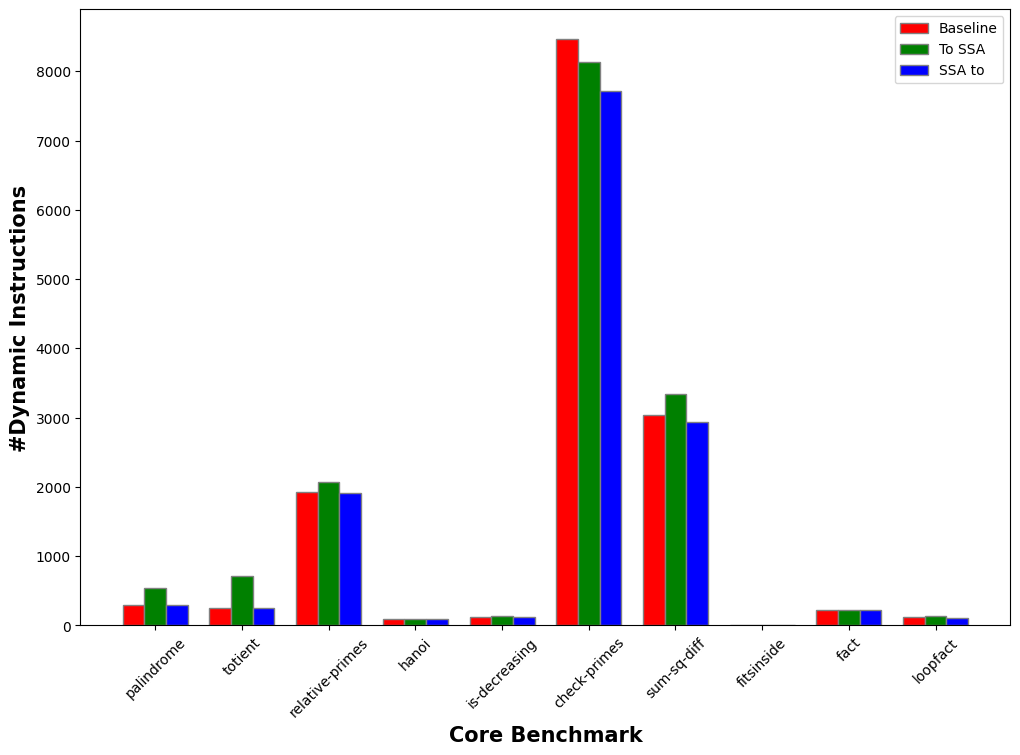

In [18]:
# extract the data
baseline_list = [data_point[2] for data_point in raw_data if data_point[1] == "baseline"]
tossa_list = [data_point[2] for data_point in raw_data if data_point[1] == "tossa"]
ssato_list = [data_point[2] for data_point in raw_data if data_point[1] == "ssato"]
licm_list = [data_point[2] for data_point in raw_data if data_point[1] == "licm"]
bench_list = [data_point[0] for data_point in raw_data if data_point[1] == "baseline"]

# plots
# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 

# Set position of bar on X axis 
br1 = np.arange(10) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 

# Make the plot
plt.bar(br1, baseline_list[5:15], color ='r', width = barWidth, 
        edgecolor ='grey', label ='Baseline') 
plt.bar(br2, tossa_list[5:15], color ='g', width = barWidth, 
        edgecolor ='grey', label ='To SSA') 
plt.bar(br3, ssato_list[5:15], color ='b', width = barWidth, 
        edgecolor ='grey', label ='SSA to') 

# Adding Xticks 
plt.xlabel('Core Benchmark', fontweight ='bold', fontsize = 15) 
plt.ylabel('#Dynamic Instructions', fontweight ='bold', fontsize = 15) 
plt.xticks([r + barWidth for r in range(10)], 
        bench_list[5:15], rotation=45) 

plt.legend()
plt.show() 


In [24]:
# code increases from baseline to tossa
base_to_tossa = [(tossa_list[i] - baseline_list[i])/baseline_list[i] for i in range(len(baseline_list))]
print(f"Baseline to To_SSA #dynamic instruction increase: {np.mean(base_to_tossa)}")
base_to_ssato = [(ssato_list[i] - baseline_list[i])/baseline_list[i] for i in range(len(baseline_list))]
print(f"Baseline to SSA_to #dynamic instruction increase: {np.mean(base_to_ssato)}")
ssato_licm = [(licm_list[i] - ssato_list[i])/ssato_list[i] for i in range(len(baseline_list)) if licm_list[i] != "incorrect"]
print(f"SSA_to to LICM #dynamic instruction increase: {np.mean(ssato_licm)}")

Baseline to To_SSA #dynamic instruction increase: 7263.9473684210525
Baseline to SSA_to #dynamic instruction increase: -161.52631578947367
SSA_to to LICM #dynamic instruction increase: -1479.65625
